In [1]:
import matplotlib
import loadnotebook
from helper import * 
import operator

importing Jupyter notebook from helper.ipynb


In [2]:
#Check the priority and set first
#And modify whitelist in helper
#lock_pci and pci_locker are for single pci map

priority = 6
set_value = 2

lock_pci=False
pci_locker=302

expected_total_point = 219
source = get_source(priority, set_value)

if lock_pci and pci_locker in whitelist_PCI:
    output_csv = "../results/demo_priority_" + str(priority) + "/set" + str(set_value)+"-"+str(pci_locker) + ".csv"
else:
    output_csv = "../results/demo_priority_" + str(priority) + "/set" + str(set_value) + ".csv"
    
def get_output_image(prefix="") :
    if lock_pci and pci_locker in whitelist_PCI:
        return "../results/demo_priority_" + str(priority) + "/images/set" + \
            str(set_value) +"/"+str(pci_locker)+ "_" + prefix + ".png"
    else:
        return "../results/demo_priority_" + str(priority) + "/images/set" + \
            str(set_value) + "_" + prefix + ".png"

In [3]:
result = extract_data(config={priority : [set_value]}, feature=False, pure=False)

helper.ipynb:777: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  "\n",


In [4]:
if set_value != 1  and priority == 6 :
    total_point = len(result.groupby(["location_x", "location_y"]).agg(['count']))
    print("total point : ", total_point)

# because set 1 we have't rename the folder based on location number
# this block only work for priority 6 set > 2
    if total_point < expected_total_point:
        d = {}
        source = get_source(priority, set_value)
        filenames, _ = get_filenames(source)
        for f in filenames : 
            d[int(f.split("/")[-2])]=f
        
        missing_point = []
        arr = np.arange(expected_total_point)
        for a in arr :
            if a not in d:
                if a < 211 or a > 282:
                    missing_point.append(a)
    
        print("number of missing point : ",expected_total_point-total_point)
        print("missing point : ", missing_point)

total point :  291


In [5]:
result

,location_x,location_y,PCI,RSRP,RSRQ,SNR,timestamp,filename
0,162.0,211.0,37,-82.8,-6.1,26.8,11:04:00.625,9.mrk
1,162.0,211.0,37,-81.1,-6.0,27.8,11:04:01.117,9.mrk
2,162.0,211.0,37,-80.4,-6.0,26.7,11:04:01.653,9.mrk
3,162.0,211.0,37,-78.4,-5.8,26.9,11:04:02.153,9.mrk
4,162.0,211.0,37,-87.3,-6.5,26.2,11:04:02.688,9.mrk
5,162.0,211.0,37,-84.6,-5.9,26.1,11:04:03.192,9.mrk
6,162.0,211.0,37,-84.7,-5.9,26.3,11:04:03.716,9.mrk
7,162.0,211.0,37,-85.3,-6.0,26.5,11:04:04.224,9.mrk
8,162.0,211.0,37,-83.7,-5.8,26.4,11:04:04.716,9.mrk
9,162.0,211.0,37,-86.7,-6.3,26.6,11:04:05.248,9.mrk


# LOCK THE PCI

In [6]:
#lock_pci=True
#pci_locker=37

#if lock_pci:
#    result=result_old
if lock_pci and pci_locker in whitelist_PCI:
    filter = result["PCI"] == pci_locker
    result_old=result
    result=result[filter]

In [7]:
result.to_csv(output_csv, index=False)

### PCI Map 

[ 37  40  39  38  42  41 247]


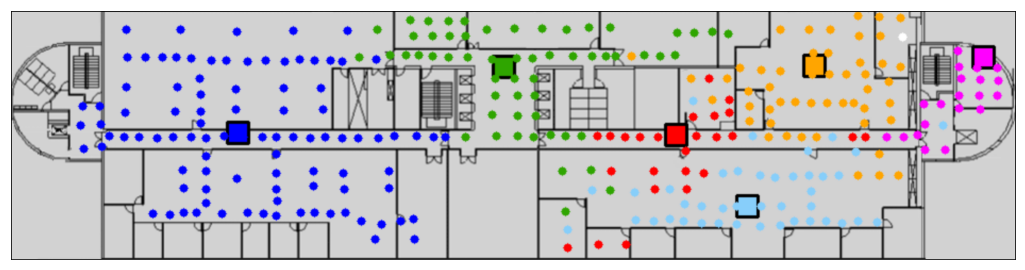

In [8]:
df = result.dropna(subset=["PCI"])
lon_list = df["location_x"].astype('int32')
lat_list = df["location_y"].astype('int32')
pci_list = df["PCI"].astype('int32')
print(df.PCI.unique())

new_format=True
new_backtorgb = get_map_image(new_format=new_format)

pci_color = [pci_color_dict[x] if x in pci_color_dict else (255, 255, 255) for x in pci_list]

new_backtorgb = visualize(new_backtorgb, lon_list, lat_list, pci_color, 
                          get_output_image("pci"), adjustment=new_format)


### PCI interference Map    

[ 37  40  39  38  42  41 247]


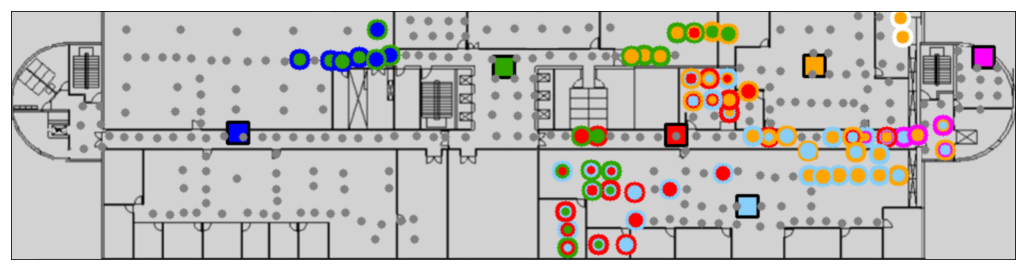

In [9]:
df = result.dropna(subset=["PCI"])
lon_list = df["location_x"].astype('int32')
lat_list = df["location_y"].astype('int32')
pci_list = df["PCI"].astype('int32')
print(df.PCI.unique())

new_format=True
new_backtorgb = get_map_image(new_format=new_format)

pci_summary = summary_based_on_location_for_pci(lat_list, lon_list, pci_list)
#structure: {lat: {lon: {pci: weight}
pci_summary = reweight_dict(pci_summary, np.array)
#structure: {lat: {lon: {pci: ln(weight)}
x_list, y_list, pci_list, weight_list = summary_dict_to_list_pci(pci_summary)
pci_color = [pci_color_dict[x] if x in pci_color_dict else (255, 255, 255) for x in pci_list]


new_backtorgb = visualize_pci(new_backtorgb, x_list, y_list, weight_list, pci_color, 
                          get_output_image("pci_interference"), adjustment=new_format)


### RSRP Location Map    

In [10]:
df = result.dropna(subset=["RSRQ"])
lon_list = df["location_x"].astype('int32')
lat_list = df["location_y"].astype('int32')
rsrp_list = df["RSRP"].astype('int32')
pci_list = df["PCI"].astype('int32')

rsrp_summary = summary_based_on_location2(lat_list, lon_list, pci_list, rsrp_list)
rsrp_summary = summary_dict2(rsrp_summary, np.array)

In [11]:
rsrp_summary=filtering_dict(rsrp_summary, np.array)

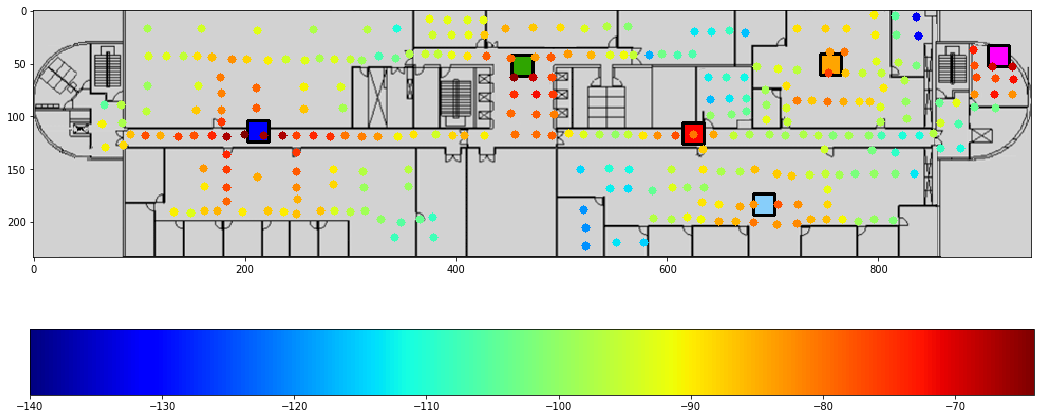

In [12]:
normalize_rsrp_mean = matplotlib.colors.Normalize(vmin=-140, vmax=-64)
rsrp_mean = summary_dict2(rsrp_summary, np.mean)
x_list, y_list, rsrp_mean_list = summary_dict_to_list(rsrp_mean)
colors_rsrp_mean = [cmap(normalize_rsrp_mean(value))[:3] for value in rsrp_mean_list]
colors_rsrp_mean = [[int(x*255) for x in value] for value in colors_rsrp_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrp_mean, 
                               cmap, normalize_rsrp_mean, get_output_image("rsrp_mean"))

In [13]:
len(rsrp_mean_list)

291

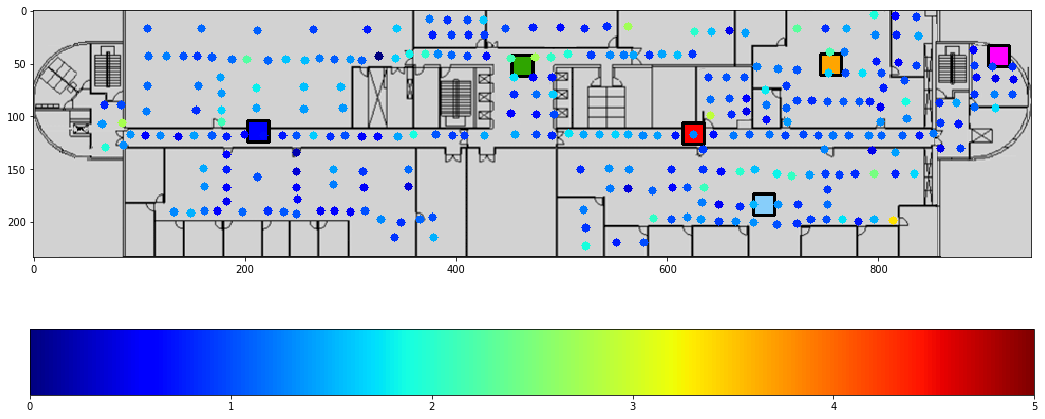

In [14]:
normalize_rsrp_std = matplotlib.colors.Normalize(vmin=0, vmax=5)
rsrp_std = summary_dict2(rsrp_summary, np.std)
x_list, y_list, rsrp_std_list = summary_dict_to_list(rsrp_std)
colors_rsrp_std = [cmap(normalize_rsrp_std(value))[:3] for value in rsrp_std_list]
colors_rsrp_std = [[int(x*255) for x in value] for value in colors_rsrp_std]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrp_std, 
                               cmap, normalize_rsrp_std, get_output_image("rsrp_std"))

### RSRQ Location Map     

In [15]:
df = result.dropna(subset=["RSRQ"])
lon_list = df["location_x"].astype('int32')
lat_list = df["location_y"].astype('int32')
rsrq_list = df["RSRQ"].astype('int32')
pci_list = df["PCI"].astype('int32')

rsrq_summary = summary_based_on_location2(lat_list, lon_list, pci_list, rsrq_list)
rsrq_summary = summary_dict2(rsrq_summary, np.array)

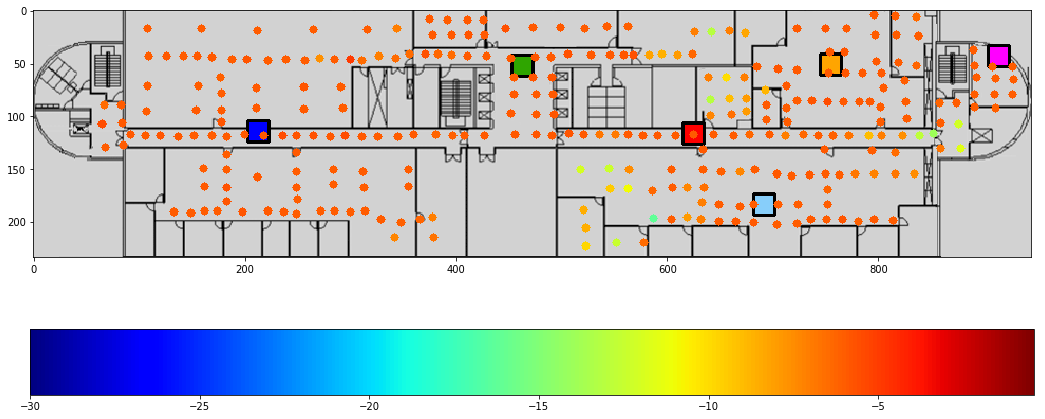

In [16]:
normalize_rsrq_mean = matplotlib.colors.Normalize(vmin=-30, vmax=-0.4)
rsrq_mean = summary_dict2(rsrq_summary, np.mean)
x_list, y_list, rsrq_mean_list = summary_dict_to_list(rsrq_mean)
colors_rsrq_mean = [cmap(normalize_rsrq_mean(value))[:3] for value in rsrq_mean_list]
colors_rsrq_mean = [[int(x*255) for x in value] for value in colors_rsrq_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrq_mean,
                               cmap, normalize_rsrq_mean, get_output_image("rsrq_mean"))

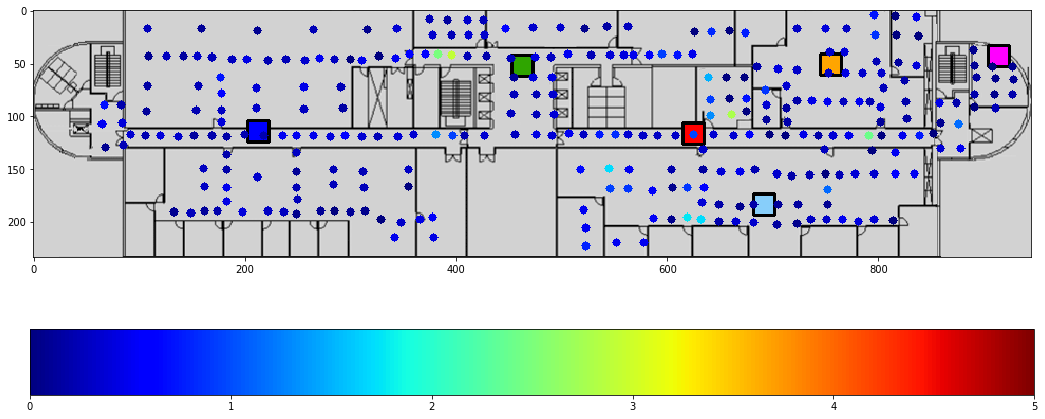

In [17]:
normalize_rsrq_std = matplotlib.colors.Normalize(vmin=0, vmax=5)
rsrq_std = summary_dict2(rsrq_summary, np.std)
x_list, y_list, rsrq_std_list = summary_dict_to_list(rsrq_std)
colors_rsrq_std = [cmap(normalize_rsrq_std(value))[:3] for value in rsrq_std_list]
colors_rsrq_std = [[int(x*255) for x in value] for value in colors_rsrq_std]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrq_std,
                               cmap, normalize_rsrq_std, get_output_image("rsrq_std"))

### SNR Location Map    

In [18]:
df = result.dropna(subset=["SNR"])
lon_list = df["location_x"].astype('int32')
lat_list = df["location_y"].astype('int32')
snr_list = df["SNR"].astype('int32')
pci_list = df["PCI"].astype('int32')

snr_summary = summary_based_on_location2(lat_list, lon_list, pci_list, snr_list)
snr_summary = summary_dict2(snr_summary, np.array)

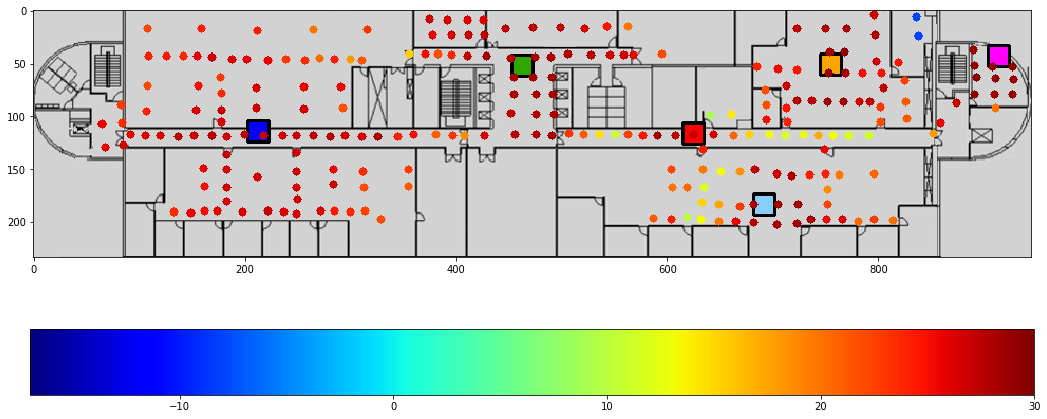

In [19]:
normalize_snr_mean = matplotlib.colors.Normalize(vmin=-17, vmax=30)
snr_mean = summary_dict2(snr_summary, np.mean)
x_list, y_list, snr_mean_list = summary_dict_to_list(snr_mean)
colors_snr_mean = [cmap(normalize_snr_mean(value))[:3] for value in snr_mean_list]
colors_snr_mean = [[int(x*255) for x in value] for value in colors_snr_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_snr_mean,
                               cmap, normalize_snr_mean, get_output_image("snr_mean"))

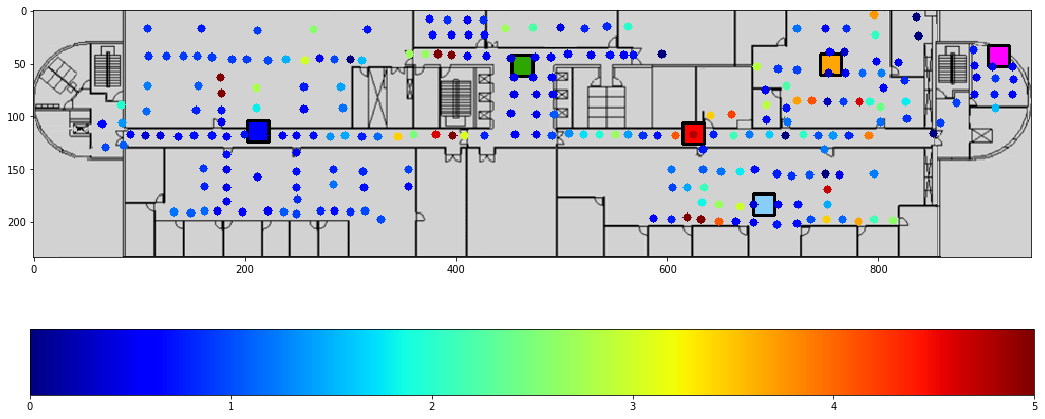

In [20]:
normalize_snr_std = matplotlib.colors.Normalize(vmin=0, vmax=5)
snr_std = summary_dict2(snr_summary, np.std)
x_list, y_list, snr_std_list = summary_dict_to_list(snr_std)
colors_snr_std = [cmap(normalize_snr_std(value))[:3] for value in snr_std_list]
colors_snr_std = [[int(x*255) for x in value] for value in colors_snr_std]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_snr_std, 
                               cmap, normalize_snr_std, get_output_image("snr_std"))

# Merge All Summary 

In [1305]:
df_summary = collect_df(["../results/demo_priority_1/*.csv", 
                         "../results/demo_priority_2/*.csv", 
                         "../results/demo_priority_3/*.csv", 
                         "../results/demo_priority_4/*.csv"])
# df_summary = collect_df(["../results/demo_priority_2/*.csv"])

helper.ipynb:252: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  "        {37:960, 38:960, 39:960, 40:960, 41:960, 42:960},\n",


In [974]:
print(df_summary.PCI.unique())
# df_summary = df_summary[df_summary["PCI"].isin(whitelist_PCI)]
# print(df_summary.PCI.unique())

[301. 302. 154. 120. 499. 151. 448. 433.  62.   1.  41.  30.  40.  88.
  86.  69.  51.  22.  21.  60.  72.  53.  15.  18.  24.  25.  19.  16.
  13.   9.  11.   8.   5.  39.  59.  58.  45.  64.  71.  97. 118. 150.
 164. 199. 176. 197. 217. 214. 211. 190. 185. 159. 137. 107.  70.  36.
  20.   6.  35.  91.  87.  95.  99.]


In [ ]:
df_summary

In [ ]:
print(df_summary.setname.unique())

In [ ]:
columns = ["location_x", "location_y", "PCI", "RSRP", "RSRQ", "SNR", "timestamp", "filename", 
           'Power_301', 'Power_302',
           '301_beam0', '301_beam32', '301_beam64', '301_beam96', '301_beam128',
           '302_beam0', '302_beam32', '302_beam64', '302_beam96', '302_beam128', 
           'Distance_301', 'Distance_302', 'Angle_301', 'Angle_302', 'setname']

In [ ]:
df_summary = df_summary[columns]

In [ ]:
df_summary.to_csv("../results/summary.csv", index=False)

# Generating Small Cell Position 

In [ ]:
mrk_filenames, _ = get_filenames("../alpha_small_cell")

In [ ]:
locations = [extract_mrk(f) for f in mrk_filenames]

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(get_map_image())

## Playground 

In [ ]:
old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[100:318, 50:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)

for bs in bs_location :
    x, y = bs_location[bs]
    x, y = int(x)-50, int(y)-100
    d = 10
    top_left = (x-d, y+d)
    bottom_right = (x+d, y-d)
    new_backtorgb = cv2.rectangle(crop, top_left, bottom_right, (255,182,193), -1)
    
for lat, lon, pci in zip(lat_list, lon_list, pci_list) :
    colour = pci_dict[pci]
    new_backtorgb = cv2.circle(crop, (lon-50, lat-100), 5, colour, -1)

plt.imshow(crop, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[100:318, 50:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)

for bs in bs_location :
    x, y = bs_location[bs]
    x, y = int(x)-50, int(y)-100
    d = 10
    top_left = (x-d, y+d)
    bottom_right = (x+d, y-d)
    new_backtorgb = cv2.rectangle(crop, top_left, bottom_right, (255,182,193), -1)
    
for lat in rsrp_summary_mean:
    for lon in rsrp_summary_mean[lat] :
        val = rsrp_summary_mean[lat][lon]
        colour = get_rsrp_color(val)
        new_backtorgb = cv2.circle(crop, (lon-50, lat-100), 5, colour, -1)
        
plt.imshow(new_backtorgb)

In [ ]:
old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[100:318, 50:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)

# put a red dot, size 40, at 2 locations:
x_plot = [x-50 for x in x_list]
y_plot = [y-100 for y in y_list]
sctr = plt.scatter(x=x_plot, y=y_plot, c=rsrp_mean_list, cmap='RdYlGn')

fig = plt.figure(figsize=(18,10))
plt.colorbar(sctr)
plt.imshow(crop)
plt.show()

In [ ]:
total_502 = []
total_503 = []
total_505 = []
other = []
for x, y in zip(lon_list, lat_list) :
    if 100 < y and y < 205 and 680 < x and x < 845:
        total_505.append((x, y))
    elif 125 < y and y < 183 and 845 < x and x < 927:
        total_503.append((x, y))
    elif 218 < y and y < 318 and 680 < x and x < 845:
        total_502.append((x, y))
    else :
        other.append((x, y))

In [ ]:
def filter(datum) :
    x = datum["location_x"]
    y = datum["location_y"]
    if 100 < y and y < 170 and 830 < x and x < 870:
        datum["room"] = "stairs"
    elif 100 < y and y < 205 and 680 < x and x < 845:
        datum["room"] = "505"
    elif 125 < y and y < 183 and 845 < x and x < 927:
        datum["room"] = "503"
    elif 218 < y and y < 318 and 680 < x and x < 845:
        datum["room"] = "502"
    else :
        datum["room"] = "other"
    
    return datum

In [ ]:
r = result[["location_x", "location_y", "filename"]]
r = r.drop_duplicates()
r = r.apply(lambda x : filter(x), axis=1)

In [ ]:
temp = r[r["room"] == "stairs"]

In [ ]:
temp

In [ ]:
new_format=True
new_backtorgb = get_map_image(new_format=new_format)
pci_color = [(255, 255, 255)] * len(temp)
new_backtorgb = visualize(new_backtorgb, temp["location_x"], temp["location_y"], pci_color, 
                          None, adjustment=new_format)

In [ ]:
x_cut = 830  
y_cut = 100 

old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[y_cut:170, x_cut:870]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
plt.imshow(crop)